In [1]:
# import library

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('final_images_df.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fractured
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fractured
2,25,26,23,21,21,21,21,21,21,21,...,32,33,31,32,31,34,33,35,33,Fractured
3,25,26,23,21,21,21,21,21,21,21,...,32,33,31,32,31,34,33,35,33,Fractured
4,0,0,0,0,0,0,7,9,16,23,...,0,0,0,0,0,0,0,0,0,Fractured


In [5]:
#train test split
from sklearn.model_selection import train_test_split

In [8]:
x=data.drop(columns='label',axis=1)
y=data['label']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [10]:
x_train.shape

(7904, 10000)

In [11]:
x_test.shape

(1976, 10000)

In [14]:
#encoding the label
encode={'Fractured':1,'Non-Fractured':0}
data['label']=data['label'].map(encode)

In [15]:
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr=LogisticRegression()

In [18]:
lr.fit(x_train,y_train)

C:\Users\kcbar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
y_pred=lr.predict(x_test)
y_pred

array(['Non-Fractured', 'Non-Fractured', 'Fractured', ...,
       'Non-Fractured', 'Fractured', 'Non-Fractured'], dtype=object)

In [22]:
#testing the accuracy
from sklearn.metrics import accuracy_score

In [24]:
acs=accuracy_score(y_test,y_pred)
acs

0.7773279352226721

In [25]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
model_dict={
    'lr_model':LogisticRegression(),
'dt_model':DecisionTreeClassifier(),
'svc_model':SVC(),
'knn_model':KNeighborsClassifier()
    
}

In [27]:
acs=[]

In [28]:
for name,model in model_dict.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    acs.append(ac)

C:\Users\kcbar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


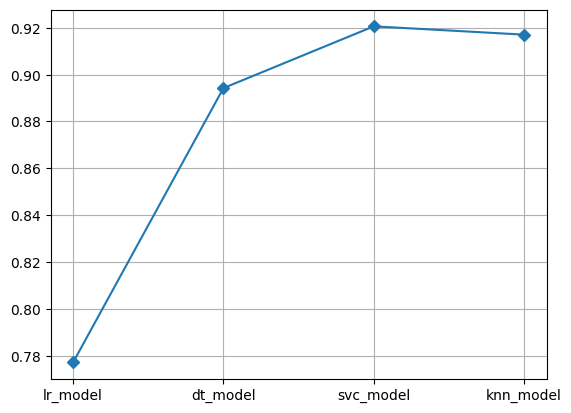

In [32]:
# plot the accuracy
plt.plot(model_dict.keys(),acs,marker='D')
plt.grid()

In [33]:
from sklearn.svm import SVC

In [34]:
svc_model=SVC()
svc_model.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [35]:
y_pred=svc_model.predict(x_test)

In [37]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9205465587044535

In [38]:
import joblib

In [39]:
joblib.dump(svc_model,'svc_model.pt')

['svc_model.pt']